<a href="https://colab.research.google.com/github/nalrob/Aprendizaje-Automatico/blob/main/CTRCD_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, roc_auc_score, recall_score,
                             f1_score, precision_score, confusion_matrix)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
from google.colab import files
uploaded= files.upload()

Saving cardiotox.zip to cardiotox.zip


In [3]:
import zipfile
import io
data=zipfile.ZipFile(io.BytesIO(uploaded['cardiotox.zip']),'r')
data.extractall()

In [4]:
### SOLO historial clinico

import pandas as pd

def import_data(from_file):
    results = []
    titles = []

    try:
        with open(from_file, 'r') as archivo:
            lineas = archivo.readlines()

            # Process the first line to extract titles
            titles = lineas[0].strip().split(';')

            # Process the missing lines
            for linea in lineas[1:]:
                values = linea.strip().split(';')
                result_iteration = process_values(values)
                results.append(result_iteration)

    except FileNotFoundError:
        print(f"Error: El archivo {from_file} no fue encontrado.")
        return None
    except Exception as e:
        print(f"Error al leer el archivo: {str(e)}")
        return None

    # Create a dataframe w results & add titles
    df_var = pd.DataFrame(results, columns=titles[:27])
    return df_var

def process_values(values):
    # Devolver los valores de las 27 primeras columnas
    return values[:27]

file = '/content/BC_cardiotox_clinical_and_functional_variables.csv'
df = import_data(file)
df

,heart_rate,age,weight,height,CTRCD,time,heart_rhythm,LVEF,PWT,LAd,...,smoker,exsmoker,ACprev,antiHER2prev,RTprev,CIprev,ICMprev,ARRprev,VALVprev,cxvalv
0,103,58,58,151,1,619,0,"60,24096386","0,8","3,8",...,,,,,,,,,,
1,94,75,66,150,0,1884,0,"66,27403031","1,093170204","3,463273568",...,0,0,0,0,0,0,0,0,0,0
2,96,53,55,149,0,1830,0,70,"0,661084178","2,894431584",...,,,,,,,,,,
3,58,67,50,"162,5",1,820,0,"56,54077998","0,798487967","3,439739698",...,,,,,,,,,,
4,76,59,70,159,0,2276,0,"67,21281916","0,73427974","2,698600354",...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,69,40,58,"158,5",0,392,0,"67,34021706","0,849898211","2,604906554",...,0,0,0,0,0,0,0,0,0,0
527,77,42,102,163,0,538,0,"73,55165001","1,020905154","2,263032997",...,0,0,0,0,0,0,0,0,0,0
528,80,45,63,171,0,2027,0,"74,78422784","0,808679193","3,376373508",...,0,0,0,0,0,0,0,0,0,0
529,91,53,69,150,0,679,0,"60,81284513","1,078942241","2,571179447",...,,,,,,,,,,


In [5]:
df = df.apply(pd.to_numeric, errors='coerce')

In [6]:
df.fillna(0, inplace=True)

In [7]:
data = df[df['AC'] == 1]

In [8]:
data.columns

Index(['heart_rate', 'age', 'weight', 'height', 'CTRCD', 'time',
       'heart_rhythm', 'LVEF', 'PWT', 'LAd', 'LVDd', 'LVSd', 'AC', 'antiHER2',
       'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev',
       'RTprev', 'CIprev', 'ICMprev', 'ARRprev', 'VALVprev', 'cxvalv'],
      dtype='object')

In [9]:
#scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
#ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev', 'RTprev', 'VALVprev']

data = data.drop(columns=['AC','LVDd','CIprev','cxvalv','heart_rhythm','ICMprev','ARRprev','VALVprev'])
data

,heart_rate,age,weight,height,CTRCD,time,LVEF,PWT,LAd,LVSd,antiHER2,HTA,DL,DM,smoker,exsmoker,ACprev,antiHER2prev,RTprev
6,74,65,54.0,164.0,1,252,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,69,48,55.0,170.0,0,1836,58.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
10,81,54,73.0,160.0,0,2483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
13,85,56,64.0,158.0,0,1627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,66,43,80.0,155.0,0,363,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,97,40,62.0,0.0,0,591,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524,82,37,62.0,161.0,0,198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
525,63,57,60.0,166.0,0,966,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
526,69,40,58.0,0.0,0,392,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X = data.drop(columns=['CTRCD'])
y = data['CTRCD']


Resultados para Random Forest:
Promedio Accuracy: 0.76
Promedio ROC AUC: 0.59
Promedio Recall: 0.23
Promedio F1 Score: 0.20
Promedio Precision: 0.18

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.79, ROC AUC: 0.66, Recall: 0.31, F1 Score: 0.28, Precision: 0.25
Grupo 2 - Accuracy: 0.81, ROC AUC: 0.52, Recall: 0.23, F1 Score: 0.24, Precision: 0.25
Grupo 3 - Accuracy: 0.76, ROC AUC: 0.65, Recall: 0.23, F1 Score: 0.20, Precision: 0.18
Grupo 4 - Accuracy: 0.73, ROC AUC: 0.60, Recall: 0.23, F1 Score: 0.18, Precision: 0.15
Grupo 5 - Accuracy: 0.70, ROC AUC: 0.53, Recall: 0.15, F1 Score: 0.12, Precision: 0.10

Matriz de confusión total:
[[359  71]
 [ 50  15]]


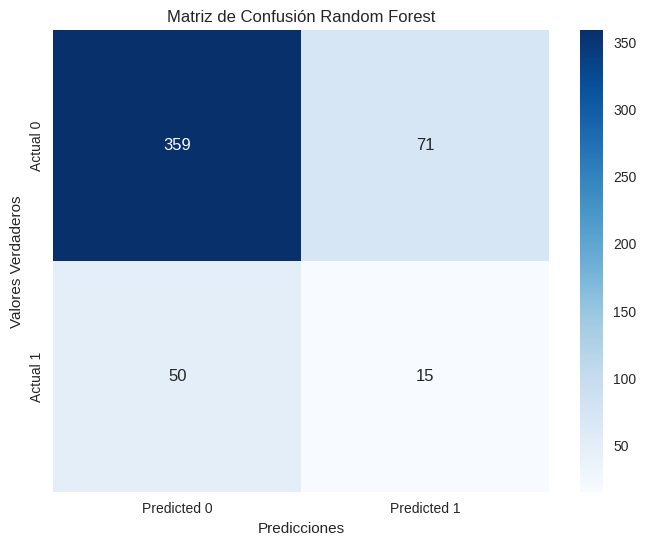

In [36]:
# Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el preprocesamiento
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev', 'RTprev']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Número de grupos
n_groups = 5

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
group_results = []  # Para almacenar resultados de cada grupo
all_y_true = []  # Para almacenar todas las etiquetas verdaderas
all_y_pred = []  # Para almacenar todas las predicciones

# Crear grupos balanceados y evaluar el modelo
for group_index in range(n_groups):
    # Separar las clases
    X_train_0 = X_train[y_train == 0]  # Muestras de la clase 0 (mayoritaria)
    X_train_1 = X_train[y_train == 1]  # Muestras de la clase 1 (minoritaria)

    # Mantener todas las muestras de la clase 1
    X_train_balanced = X_train_1.copy()
    y_train_balanced = y_train[y_train == 1].copy()

    # Muestrear aleatoriamente con reemplazo 37 muestras de la clase 0
    X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
    y_train_0_sampled = y_train.loc[X_train_0_sampled.index]

    # Añadir las muestras de la clase 0 al conjunto balanceado
    X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
    y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)

    # Acumular etiquetas verdaderas y predicciones
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc if roc_auc is not None else 0)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc if roc_auc is not None else 0,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular la matriz de confusión total
final_cm = confusion_matrix(all_y_true, all_y_pred)

# Calcular y mostrar el promedio de métricas
print("\nResultados para Random Forest:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")

# Mostrar la matriz de confusión total
print("\nMatriz de confusión total:")
print(final_cm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión Random Forest')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()




Resultados para Naive Bayes:
Promedio Accuracy: 0.36
Promedio ROC AUC: 0.62
Promedio Recall: 0.91
Promedio F1 Score: 0.27
Promedio Precision: 0.16

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.36, ROC AUC: 0.62, Recall: 0.92, F1 Score: 0.28, Precision: 0.16
Grupo 2 - Accuracy: 0.33, ROC AUC: 0.62, Recall: 0.92, F1 Score: 0.27, Precision: 0.16
Grupo 3 - Accuracy: 0.39, ROC AUC: 0.64, Recall: 0.85, F1 Score: 0.27, Precision: 0.16
Grupo 4 - Accuracy: 0.34, ROC AUC: 0.64, Recall: 0.92, F1 Score: 0.27, Precision: 0.16
Grupo 5 - Accuracy: 0.34, ROC AUC: 0.60, Recall: 0.92, F1 Score: 0.27, Precision: 0.16

Matriz de confusión total:
[[117 313]
 [  6  59]]


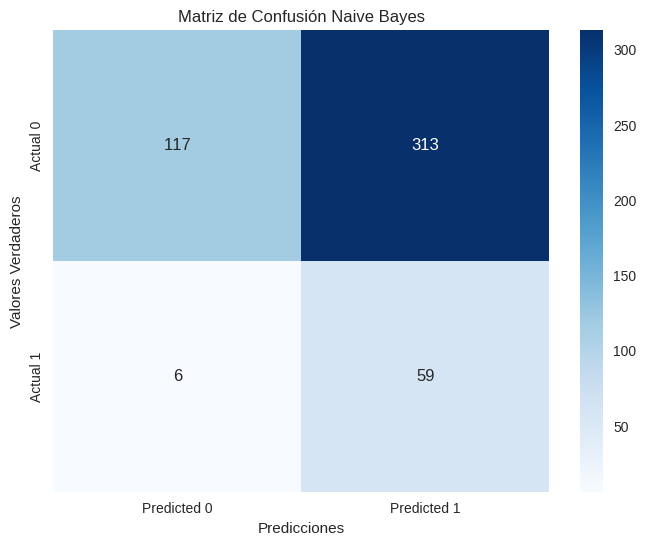

In [40]:
#Naive Bayes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el preprocesamiento
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev', 'RTprev']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Número de grupos
n_groups = 5

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', GaussianNB())])  # Usar Naive Bayes

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
group_results = []  # Para almacenar resultados de cada grupo
all_y_true = []  # Para almacenar todas las etiquetas verdaderas
all_y_pred = []  # Para almacenar todas las predicciones

# Crear grupos balanceados y evaluar el modelo
for group_index in range(n_groups):
    # Separar las clases
    X_train_0 = X_train[y_train == 0]  # Muestras de la clase 0 (mayoritaria)
    X_train_1 = X_train[y_train == 1]  # Muestras de la clase 1 (minoritaria)

    # Mantener todas las muestras de la clase 1
    X_train_balanced = X_train_1.copy()
    y_train_balanced = y_train[y_train == 1].copy()

    # Muestrear aleatoriamente con reemplazo 37 muestras de la clase 0
    X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
    y_train_0_sampled = y_train.loc[X_train_0_sampled.index]

    # Añadir las muestras de la clase 0 al conjunto balanceado
    X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
    y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)

    # Acumular etiquetas verdaderas y predicciones
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc if roc_auc is not None else 0)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc if roc_auc is not None else 0,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular la matriz de confusión total
final_cm = confusion_matrix(all_y_true, all_y_pred)

# Calcular y mostrar el promedio de métricas
print("\nResultados para Naive Bayes:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")

# Mostrar la matriz de confusión total
print("\nMatriz de confusión total:")
print(final_cm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión Naive Bayes')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()


In [41]:
# Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definir el preprocesamiento
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev', 'RTprev']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ]
)

# Inicializar el modelo Naive Bayes
model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GaussianNB())])

# Número de grupos
n_groups = 5

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
group_results = []

# Crear grupos balanceados y evaluar el modelo
for group_index in range(n_groups):
    # Separar las clases
    X_train_0 = X_train[y_train == 0]
    X_train_1 = X_train[y_train == 1]

    # Mantener todas las muestras de la clase 1
    X_train_balanced = X_train_1.copy()
    y_train_balanced = y_train[y_train == 1].copy()

    # Muestrear aleatoriamente con reemplazo 37 muestras de la clase 0
    X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
    y_train_0_sampled = y_train.loc[X_train_0_sampled.index]

    # Añadir las muestras de la clase 0 al conjunto balanceado
    X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
    y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc if roc_auc is not None else 0)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc if roc_auc is not None else 0,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular y mostrar el promedio de métricas
print("\nResultados para Naive Bayes:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")



Resultados para Naive Bayes:
Promedio Accuracy: 0.63
Promedio ROC AUC: 0.70
Promedio Recall: 0.60
Promedio F1 Score: 0.29
Promedio Precision: 0.27

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.32, ROC AUC: 0.59, Recall: 0.82, F1 Score: 0.21, Precision: 0.12
Grupo 2 - Accuracy: 0.78, ROC AUC: 0.80, Recall: 0.64, F1 Score: 0.39, Precision: 0.28
Grupo 3 - Accuracy: 0.89, ROC AUC: 0.78, Recall: 0.18, F1 Score: 0.27, Precision: 0.50
Grupo 4 - Accuracy: 0.81, ROC AUC: 0.65, Recall: 0.55, F1 Score: 0.39, Precision: 0.30
Grupo 5 - Accuracy: 0.35, ROC AUC: 0.67, Recall: 0.82, F1 Score: 0.22, Precision: 0.13



Resultados para KNN:
Promedio Accuracy: 0.77
Promedio ROC AUC: 0.61
Promedio Recall: 0.26
Promedio F1 Score: 0.23
Promedio Precision: 0.21

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.78, ROC AUC: 0.65, Recall: 0.31, F1 Score: 0.27, Precision: 0.24
Grupo 2 - Accuracy: 0.69, ROC AUC: 0.60, Recall: 0.31, F1 Score: 0.21, Precision: 0.15
Grupo 3 - Accuracy: 0.82, ROC AUC: 0.62, Recall: 0.23, F1 Score: 0.25, Precision: 0.27
Grupo 4 - Accuracy: 0.76, ROC AUC: 0.60, Recall: 0.31, F1 Score: 0.25, Precision: 0.21
Grupo 5 - Accuracy: 0.79, ROC AUC: 0.58, Recall: 0.15, F1 Score: 0.16, Precision: 0.17

Matriz de confusión total:
[[362  68]
 [ 48  17]]


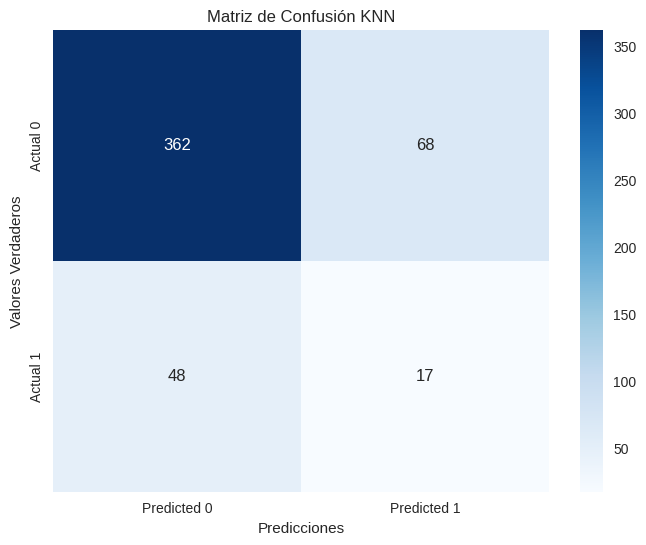

In [38]:
#KNN

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, recall_score, f1_score, precision_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Separar el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el preprocesamiento
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev', 'RTprev']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Número de grupos
n_groups = 5

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier())])  # Usar KNN

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
group_results = []  # Para almacenar resultados de cada grupo
all_y_true = []  # Para almacenar todas las etiquetas verdaderas
all_y_pred = []  # Para almacenar todas las predicciones

# Crear grupos balanceados y evaluar el modelo
for group_index in range(n_groups):
    # Separar las clases
    X_train_0 = X_train[y_train == 0]  # Muestras de la clase 0 (mayoritaria)
    X_train_1 = X_train[y_train == 1]  # Muestras de la clase 1 (minoritaria)

    # Mantener todas las muestras de la clase 1
    X_train_balanced = X_train_1.copy()
    y_train_balanced = y_train[y_train == 1].copy()

    # Muestrear aleatoriamente con reemplazo 37 muestras de la clase 0
    X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
    y_train_0_sampled = y_train.loc[X_train_0_sampled.index]

    # Añadir las muestras de la clase 0 al conjunto balanceado
    X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
    y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)

    # Acumular etiquetas verdaderas y predicciones
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc if roc_auc is not None else 0)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc if roc_auc is not None else 0,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular la matriz de confusión total
final_cm = confusion_matrix(all_y_true, all_y_pred)

# Calcular y mostrar el promedio de métricas
print("\nResultados para KNN:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")

# Mostrar la matriz de confusión total
print("\nMatriz de confusión total:")
print(final_cm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión KNN')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()



Resultados para Regresión Logística:
Promedio Accuracy: 0.71
Promedio ROC AUC: 0.63
Promedio Recall: 0.42
Promedio F1 Score: 0.27
Promedio Precision: 0.20

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.71, ROC AUC: 0.67, Recall: 0.38, F1 Score: 0.26, Precision: 0.19
Grupo 2 - Accuracy: 0.69, ROC AUC: 0.60, Recall: 0.38, F1 Score: 0.24, Precision: 0.18
Grupo 3 - Accuracy: 0.72, ROC AUC: 0.60, Recall: 0.38, F1 Score: 0.26, Precision: 0.20
Grupo 4 - Accuracy: 0.72, ROC AUC: 0.68, Recall: 0.54, F1 Score: 0.33, Precision: 0.24
Grupo 5 - Accuracy: 0.72, ROC AUC: 0.59, Recall: 0.38, F1 Score: 0.26, Precision: 0.20

Matriz de confusión total:
[[324 106]
 [ 38  27]]


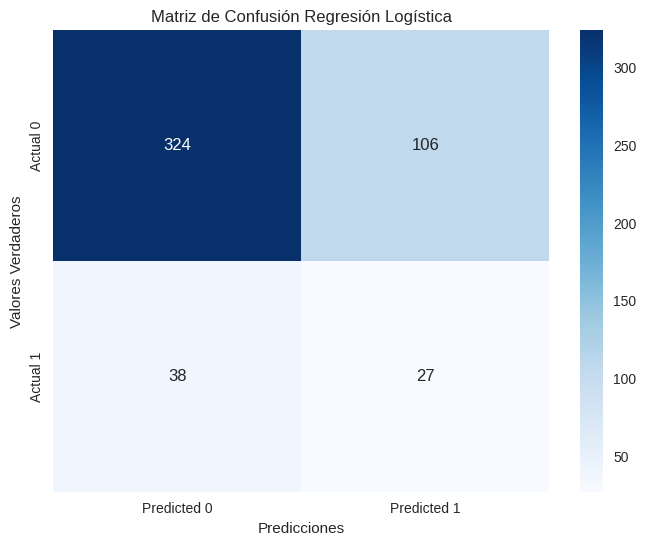

In [42]:
#Logistic Regression

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, recall_score, f1_score, precision_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression  # Importar Regresión Logística
from sklearn.pipeline import Pipeline

# Separar el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el preprocesamiento
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev', 'RTprev']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Número de grupos
n_groups = 5

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42, max_iter=1000))])  # Usar Regresión Logística

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
group_results = []  # Para almacenar resultados de cada grupo
all_y_true = []  # Para almacenar todas las etiquetas verdaderas
all_y_pred = []  # Para almacenar todas las predicciones

# Crear grupos balanceados y evaluar el modelo
for group_index in range(n_groups):
    # Separar las clases
    X_train_0 = X_train[y_train == 0]  # Muestras de la clase 0 (mayoritaria)
    X_train_1 = X_train[y_train == 1]  # Muestras de la clase 1 (minoritaria)

    # Mantener todas las muestras de la clase 1
    X_train_balanced = X_train_1.copy()
    y_train_balanced = y_train[y_train == 1].copy()

    # Muestrear aleatoriamente con reemplazo 37 muestras de la clase 0
    X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
    y_train_0_sampled = y_train.loc[X_train_0_sampled.index]

    # Añadir las muestras de la clase 0 al conjunto balanceado
    X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
    y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)

    # Acumular etiquetas verdaderas y predicciones
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc if roc_auc is not None else 0)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc if roc_auc is not None else 0,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular la matriz de confusión total
final_cm = confusion_matrix(all_y_true, all_y_pred)

# Calcular y mostrar el promedio de métricas
print("\nResultados para Regresión Logística:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")

# Mostrar la matriz de confusión total
print("\nMatriz de confusión total:")
print(final_cm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión Regresión Logística')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()



Resultados para SVC:
Promedio Accuracy: 0.82
Promedio ROC AUC: 0.66
Promedio Recall: 0.29
Promedio F1 Score: 0.30
Promedio Precision: 0.32

Resultados de cada grupo:
Grupo 1 - Accuracy: 0.85, ROC AUC: 0.68, Recall: 0.31, F1 Score: 0.35, Precision: 0.40
Grupo 2 - Accuracy: 0.76, ROC AUC: 0.68, Recall: 0.31, F1 Score: 0.25, Precision: 0.21
Grupo 3 - Accuracy: 0.86, ROC AUC: 0.66, Recall: 0.31, F1 Score: 0.36, Precision: 0.44
Grupo 4 - Accuracy: 0.81, ROC AUC: 0.67, Recall: 0.31, F1 Score: 0.30, Precision: 0.29
Grupo 5 - Accuracy: 0.82, ROC AUC: 0.61, Recall: 0.23, F1 Score: 0.25, Precision: 0.27

Matriz de confusión total:
[[386  44]
 [ 46  19]]


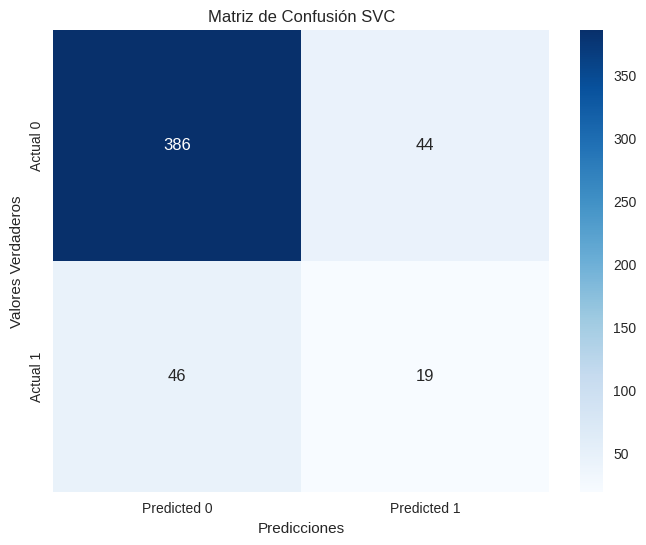

In [37]:
#SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, recall_score, f1_score, precision_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Separar el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el preprocesamiento
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev', 'RTprev']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ])

# Número de grupos
n_groups = 5

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC(probability=True, random_state=42))])  # Usar SVC

# Almacenar métricas promedio y resultados de cada grupo
metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
group_results = []  # Para almacenar resultados de cada grupo
all_y_true = []  # Para almacenar todas las etiquetas verdaderas
all_y_pred = []  # Para almacenar todas las predicciones

# Crear grupos balanceados y evaluar el modelo
for group_index in range(n_groups):
    # Separar las clases
    X_train_0 = X_train[y_train == 0]  # Muestras de la clase 0 (mayoritaria)
    X_train_1 = X_train[y_train == 1]  # Muestras de la clase 1 (minoritaria)

    # Mantener todas las muestras de la clase 1
    X_train_balanced = X_train_1.copy()
    y_train_balanced = y_train[y_train == 1].copy()

    # Muestrear aleatoriamente con reemplazo 37 muestras de la clase 0
    X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
    y_train_0_sampled = y_train.loc[X_train_0_sampled.index]

    # Añadir las muestras de la clase 0 al conjunto balanceado
    X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
    y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

    # Entrenar el modelo
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)

    # Acumular etiquetas verdaderas y predicciones
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Almacenar métricas
    metrics['accuracy'].append(accuracy)
    metrics['roc_auc'].append(roc_auc if roc_auc is not None else 0)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)
    metrics['precision'].append(precision)

    # Almacenar resultados de este grupo
    group_results.append({
        'Group': group_index + 1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc if roc_auc is not None else 0,
        'Recall': recall,
        'F1 Score': f1,
        'Precision': precision
    })

# Calcular la matriz de confusión total
final_cm = confusion_matrix(all_y_true, all_y_pred)

# Calcular y mostrar el promedio de métricas
print("\nResultados para SVC:")
print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

# Mostrar resultados de cada grupo
print("\nResultados de cada grupo:")
for result in group_results:
    print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
          f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
          f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")

# Mostrar la matriz de confusión total
print("\nMatriz de confusión total:")
print(final_cm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión SVC')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score, precision_score

# Supongamos que 'data' es tu DataFrame y 'CTRCD' es la variable objetivo
X = data.drop(columns=['CTRCD'])
y = data['CTRCD']

# Dividir en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definir el preprocesamiento
scale = ['heart_rate', 'age', 'weight', 'height', 'time', 'LVEF', 'PWT', 'LAd', 'LVSd']
ohe = ['antiHER2', 'HTA', 'DL', 'DM', 'smoker', 'exsmoker', 'ACprev', 'antiHER2prev', 'RTprev']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
    ]
)

# Definir los modelos
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVC': SVC(probability=True, random_state=42)  # Necesario para calcular ROC-AUC
}

# Número de grupos
n_groups = 10

# Iterar sobre los modelos
for model_name, model_class in models.items():

    # Inicializar el pipeline para cada modelo
    model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_class)])

    # Almacenar métricas promedio y resultados de cada grupo
    metrics = {'accuracy': [], 'roc_auc': [], 'recall': [], 'f1': [], 'precision': []}
    group_results = []

    # Crear grupos balanceados y evaluar el modelo
    for group_index in range(n_groups):
        # Separar las clases
        X_train_0 = X_train[y_train == 0]
        X_train_1 = X_train[y_train == 1]

        # Mantener todas las muestras de la clase 1
        X_train_balanced = X_train_1.copy()
        y_train_balanced = y_train[y_train == 1].copy()

        # Muestrear aleatoriamente con reemplazo 37 muestras de la clase 0
        X_train_0_sampled = X_train_0.sample(n=37, replace=True, random_state=group_index)
        y_train_0_sampled = y_train.loc[X_train_0_sampled.index]

        # Añadir las muestras de la clase 0 al conjunto balanceado
        X_train_balanced = pd.concat([X_train_balanced, X_train_0_sampled])
        y_train_balanced = pd.concat([y_train_balanced, y_train_0_sampled])

        # Entrenar el modelo
        model.fit(X_train_balanced, y_train_balanced)
        y_pred = model.predict(X_test)

        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        # Almacenar métricas
        metrics['accuracy'].append(accuracy)
        metrics['roc_auc'].append(roc_auc if roc_auc is not None else 0)
        metrics['recall'].append(recall)
        metrics['f1'].append(f1)
        metrics['precision'].append(precision)

        # Almacenar resultados de este grupo
        group_results.append({
            'Group': group_index + 1,
            'Accuracy': accuracy,
            'ROC AUC': roc_auc if roc_auc is not None else 0,
            'Recall': recall,
            'F1 Score': f1,
            'Precision': precision
        })

    # Calcular y mostrar el promedio de métricas para el modelo actual
    print(f"\nResultados para {model_name}:")
    print(f"Promedio Accuracy: {np.mean(metrics['accuracy']):.2f}")
    print(f"Promedio ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
    print(f"Promedio Recall: {np.mean(metrics['recall']):.2f}")
    print(f"Promedio F1 Score: {np.mean(metrics['f1']):.2f}")
    print(f"Promedio Precision: {np.mean(metrics['precision']):.2f}")

    # Mostrar resultados de cada grupo
    print(f"\nResultados de cada grupo para {model_name}:")
    for result in group_results:
        print(f"Grupo {result['Group']} - Accuracy: {result['Accuracy']:.2f}, "
              f"ROC AUC: {result['ROC AUC']:.2f}, Recall: {result['Recall']:.2f}, "
              f"F1 Score: {result['F1 Score']:.2f}, Precision: {result['Precision']:.2f}")



Resultados para Random Forest:
Promedio Accuracy: 0.68
Promedio ROC AUC: 0.69
Promedio Recall: 0.53
Promedio F1 Score: 0.26
Promedio Precision: 0.18

Resultados de cada grupo para Random Forest:
Grupo 1 - Accuracy: 0.67, ROC AUC: 0.68, Recall: 0.55, F1 Score: 0.27, Precision: 0.18
Grupo 2 - Accuracy: 0.74, ROC AUC: 0.64, Recall: 0.73, F1 Score: 0.38, Precision: 0.26
Grupo 3 - Accuracy: 0.71, ROC AUC: 0.67, Recall: 0.45, F1 Score: 0.26, Precision: 0.18
Grupo 4 - Accuracy: 0.66, ROC AUC: 0.70, Recall: 0.36, F1 Score: 0.19, Precision: 0.13
Grupo 5 - Accuracy: 0.64, ROC AUC: 0.75, Recall: 0.64, F1 Score: 0.28, Precision: 0.18
Grupo 6 - Accuracy: 0.69, ROC AUC: 0.78, Recall: 0.64, F1 Score: 0.31, Precision: 0.21
Grupo 7 - Accuracy: 0.61, ROC AUC: 0.70, Recall: 0.64, F1 Score: 0.26, Precision: 0.17
Grupo 8 - Accuracy: 0.68, ROC AUC: 0.73, Recall: 0.55, F1 Score: 0.27, Precision: 0.18
Grupo 9 - Accuracy: 0.71, ROC AUC: 0.60, Recall: 0.36, F1 Score: 0.22, Precision: 0.15
Grupo 10 - Accuracy: 